# 2021-10-07 Third batch of deterministic model fits

Results below are for commit: ###
(Rerunning the code below for other commits is not guaranteed/likely to give the same results.)

Same as the previous diary entry, but with a slightly denser/enlarged parameter grid:

    PARAM_ARRAYS['T_delta'] = (10, 20, 40, 60, 90)
    PARAM_ARRAYS['beta_V'] = (1, 3, 5, 9, 15, 27, 45, 81, 135, 243)
    PARAM_ARRAYS['T_Of'] = (0.5, 1, 2, 4, math.inf)
    PARAM_ARRAYS['sigma_O'] = (0.02, 0.05, 0.1, 0.2, 0.5, 1, 2.5)
    
I have also improved `do_2...py` a little bit, to give more detail on main vs secondary criteria, with the `ActPedLeading` criteria belonging to the latter.

## Overview results for all models

In [6]:
%run ../SCPaper/do_2_analyse_deterministic_fits

['C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVA.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAa.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEo.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEooBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEooBEvoAI.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEvoAI.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAoBEo.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAoBEooBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAoBEooBEvoAI.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAoBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAoBEvoAI.pkl']

Loading parameter search from file "C:\GITHUB\COMMOTIONSFramework\SCPaper/results\DetFit_oVA.pkl"...
	Done.


## In-depth looks / discussion

None of the conclusions change compared to the previous, smaller run. In the output above, we can see a bit clearer than before that the `ActPedLeading` criteria (now considered secondary criteria) are not met at all by the best-performing models, reinforcing the notion that we need more things in the model to reproduce the "pedestrian hesitating then speeding up" phenomenon in a model that also achieves the four criteria listed as "main criteria" now.

Also the parameter values below tell the same basic story as in the previous run, in terms of a redundancy between $T_\delta$ and $\beta_V$. We can now also see a slight redundancy between $T_{Of}$ and $\sigma_O$, where the small $\sigma_O = 0.02$ m only works for if the time scale for forgetting is quite short ($T_{Of} \leq 1$).

In [7]:
for model in ('oVAoBEvoAI', 'oVAoBEooBEvoAI'):
    print(f'Parameterisations for model {model} meeting all four criteria:')
    fit = det_fits[model]
    i_good_parameterisations = np.nonzero(fit.n_main_criteria_met == 4)[0]
    for i_param in i_good_parameterisations:
        print(fit.get_params_dict(fit.results.params_matrix[i_param, :]))
    print()

Parameterisations for model oVAoBEvoAI meeting all four criteria:
{'T_delta': 10.0, 'beta_V': 5.0}
{'T_delta': 10.0, 'beta_V': 9.0}
{'T_delta': 20.0, 'beta_V': 9.0}
{'T_delta': 20.0, 'beta_V': 15.0}
{'T_delta': 40.0, 'beta_V': 27.0}
{'T_delta': 60.0, 'beta_V': 27.0}
{'T_delta': 40.0, 'beta_V': 45.0}
{'T_delta': 60.0, 'beta_V': 45.0}
{'T_delta': 90.0, 'beta_V': 45.0}
{'T_delta': 90.0, 'beta_V': 81.0}

Parameterisations for model oVAoBEooBEvoAI meeting all four criteria:
{'T_delta': 20.0, 'beta_V': 9.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 20.0, 'beta_V': 15.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 40.0, 'beta_V': 27.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 60.0, 'beta_V': 27.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 40.0, 'beta_V': 45.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 60.0, 'beta_V': 45.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 90.0, 'beta_V': 45.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 90.0, 'beta_V': 81.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 40.

### Pedestrian hesitation from otherwise non-viable `oBEo` parameterisation
Out of interest, below I am simulating one of the parameterisations for `oVAoBEooBEvoAI` which achieved "pedestrian hesitation" in the constant-speed scenario. This is a parameterisation with a lower $\beta_V$ than those in the most successful parameterisations above, and where also $\sigma_O$ is relatively high. Overall, this promotes behaviour beliefs near 50/50, which is what is needed to see the pedestrian hesitation in the constant-speed scenario, but which doesn't seem sensible in general, and doesn't meet the other criteria. This reinforces the notion that the current set of assumptions don't really offer what's needed to achieve this sort of hesitation in a natural way.

{'T_delta': 90.0, 'beta_V': 1.0, 'T_Of': 1.0, 'sigma_O': 1.0}
ActVehStatPed


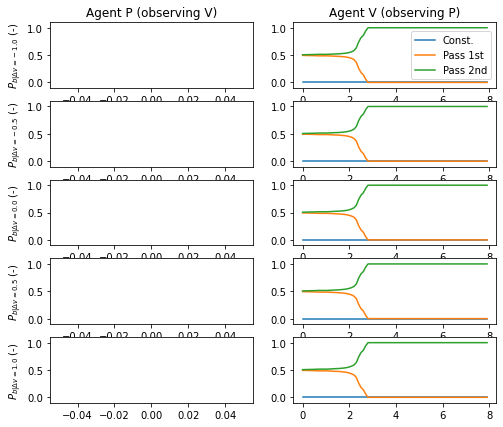

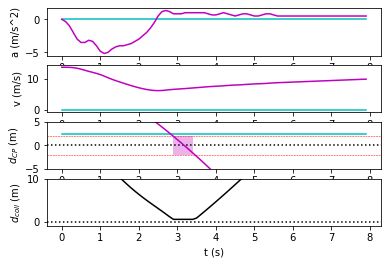

ActVehStatPedPrio


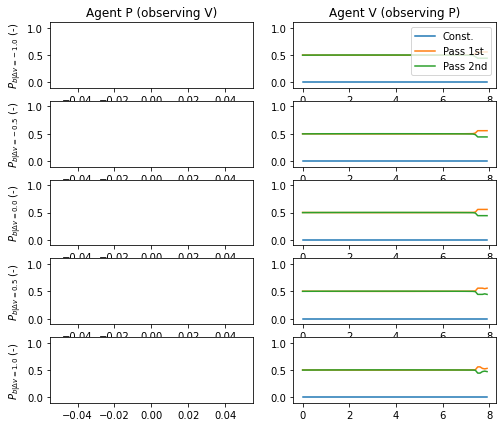

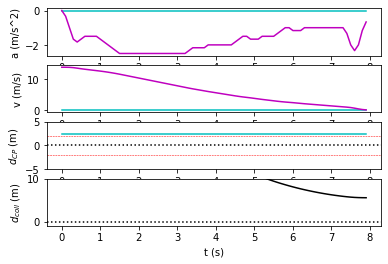

ActPedLeading


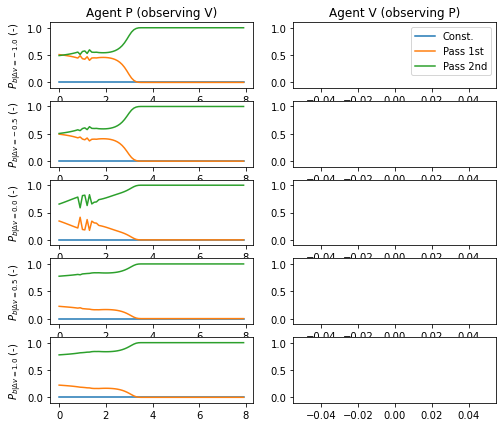

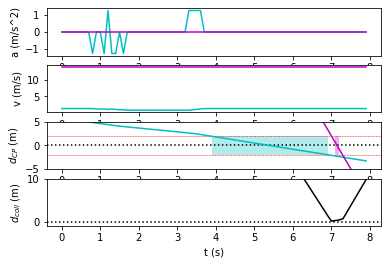

ActPedPrioEncounter


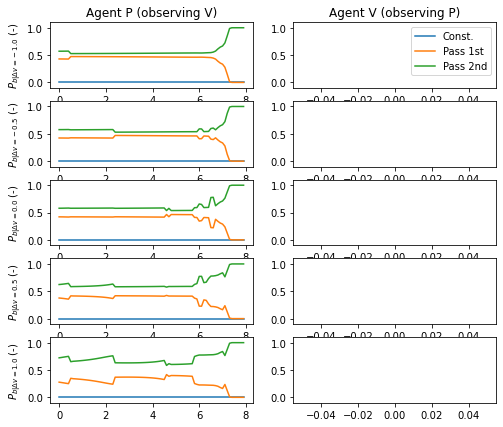

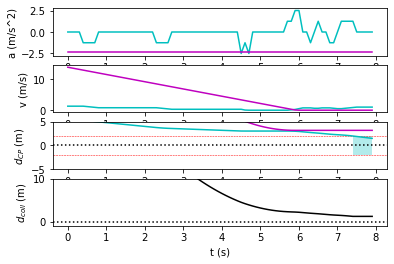

In [10]:
# first just need to add the SCPaper folder to the Python path, to import sc_fitting
import os
THIS_DIR = os.path.abspath('.')
PARENT_DIR, __ = os.path.split(THIS_FILE_DIR)
SCPAPER_DIR = PARENT_DIR + '/SCPaper'
if not PARENT_DIR in sys.path:
    sys.path.append(PARENT_DIR)
import sc_fitting

# simulate oVAoBEooBEvoAI for a parameterisation that achieved pedestrian hesitation in the constant speed scenario
fit = det_fits['oVAoBEooBEvoAI']
i_sec_crit = SEC_CRITERIA.index('ped_hesitate_const')
met_sec_crit = np.nonzero(fit.sec_criteria_matrix[i_sec_crit,:])[0]
free_params = fit.results.params_matrix[met_sec_crit[0],:]
print(fit.get_params_dict(free_params))
fit.set_params(free_params)
for scenario in sc_fitting.DET1S_SCENARIOS.values():
    print(scenario.name)
    sim = fit.simulate_scenario(scenario)
    sim.do_plots(kinem_states=True, beh_probs=True)

### Closer look at the pedestrian start before vehicle stop criterion
Looking closer at the speed profiles in the `ActPedPrioEncounter` the effect is smaller than what one might have hoped for the `oVAoBE*` models, just a tenth of a seconds difference. This is sort of in line with what I have seen before though (e.g., diary notes 2021-08-27), and I know it is because the vehicle is actually decelerating to stop earlier than what the pedestrian expects from a stopping, which means that even when the pedestrian is convinced the vehicle will stop, it still looks like it will be having some speed at its predicted state, which makes it look like crossing will need a big acceleration. 

What surprises me now though that not even the `oVAaoBE*` models do better than this... Based on the previous results (e.g., diary notes 2021-09-01 and 2021-09-08), I was expecting to see some very early crossing from these models.

oVA
{'T_delta': 10.0}
Main criteria met: [False False  True False]


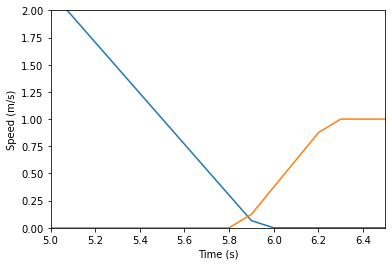

oVAoBEvoAI
{'T_delta': 10.0, 'beta_V': 5.0}
Main criteria met: [ True  True  True  True]


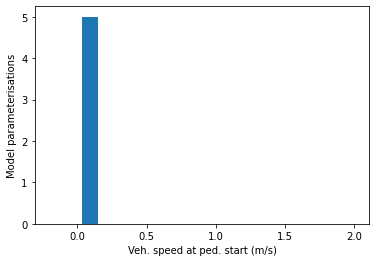

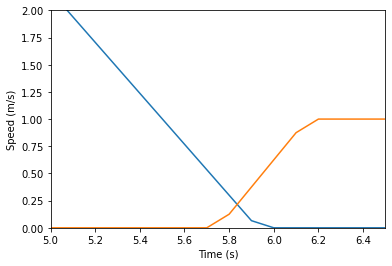

oVAoBEooBEvoAI
{'T_delta': 20.0, 'beta_V': 9.0, 'T_Of': 0.5, 'sigma_O': 0.05}
Main criteria met: [ True  True  True  True]


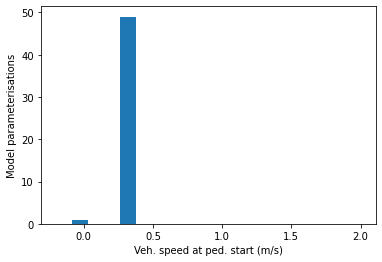

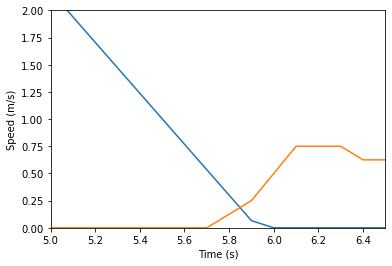

oVAaoBEo
{'T_delta': 10.0, 'T_Of': 0.5, 'sigma_O': 0.05}
Main criteria met: [False False  True  True]


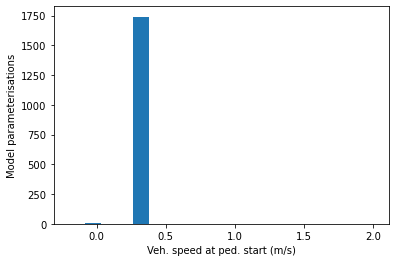

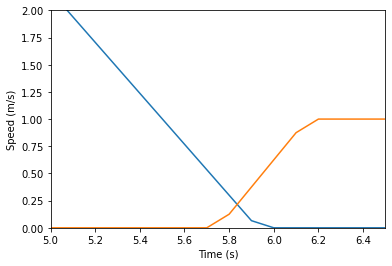

oVAaoBEooBEvoAI
{'T_delta': 60.0, 'beta_V': 9.0, 'T_Of': 0.5, 'sigma_O': 0.05}
Main criteria met: [False  True  True  True]


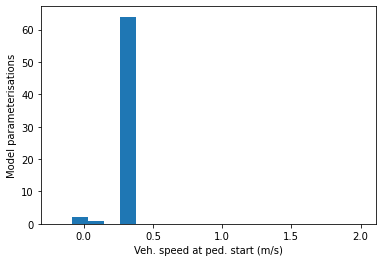

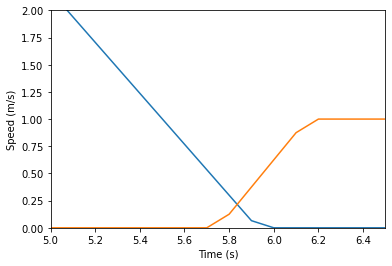

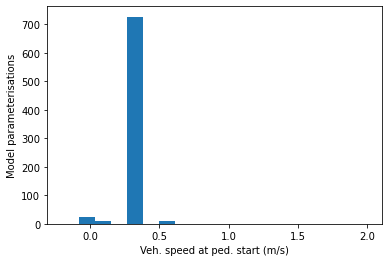

In [53]:
import matplotlib.pyplot as plt
for model in ('oVA', 'oVAoBEvoAI', 'oVAoBEooBEvoAI', 'oVAaoBEo', 'oVAaoBEooBEvoAI'):
    print(model)
    fit = det_fits[model]
    i_parameterisation = np.nonzero(fit.n_main_criteria_met == np.max(fit.n_main_criteria_met))[0][0]
    params_array = fit.results.params_matrix[i_parameterisation, :]
    crit_array = fit.main_criteria_matrix[:, i_parameterisation]
    print(fit.get_params_dict(params_array))
    print('Main criteria met: ', end='')
    print(crit_array)
    #main_crit_dict = {crit : crit_array[i_crit]
    #                  for i_crit, crit in enumerate(sc_fittingMAIN_CRITERIA)}
    sim = fit.simulate_scenario(sc_fitting.DET1S_SCENARIOS['ActPedPrioEncounter'])
    plt.figure()
    plt.plot(sim.time_stamps, sim.agents[sc_fitting.i_VEH_AGENT].trajectory.long_speed)
    plt.plot(sim.time_stamps, sim.agents[sc_fitting.i_PED_AGENT].trajectory.long_speed)
    plt.axis([5, 6.5, 0, 2])
    plt.xlabel('Time (s)')
    plt.ylabel('Speed (m/s)')
    plt.show()
    plt.figure()
    plt.hist(fit.results.metrics_matrix[
        :,fit.metric_names.index('ActPedPrioEncounter_veh_speed_at_ped_start')],
            bins=np.linspace(-0.2, 2, 20))
    plt.xlabel('Veh. speed at ped. start (m/s)')
    plt.ylabel('Model parameterisations')

Ah, ok, now after playing around a bit with the `oVAaoBE*` models I believe I get what's happening. With the parameterisation for `oVAaoBEo` shown in the plots just above, which achieves pedestrian hesitation but only the surprisingly small anticipation of vehicle stopping by the pedestrian, we can see in the plots below that the belief formation is slow/diffuse enough for the "pass 2nd" belief to never completely dominate over the "constant speed" belief, which is what causes the hesitant deceleration, but which also means that the pedestrian will not start crossing until the vehicle is very nearly completely stopped. 

If I reduce the behaviour observation noise from $\sigma_O = 0.05$ m to $\sigma_O = 0.02$ m (the next lower value in the grid), we see below that we get quicker belief formation, but what happens then is that the pedestrian never hesitates at all and just goes ahead and crosses. In my implementation of the `ped_start_bef_veh_stop` I only look for a "start" speed increase if there has first been a speed decrease - so this parameterisation was not flagged up as meeting this criterion. Which is ok, I think, because there is no real "start", and the behaviour doesn't look too reasonable overall. 

By tweaking to an intermediate $\sigma_O = 0.03$ m that wasn't in the grid in these runs, I can get a small dip in speed, which wouldn't have registered as meeting the `ped_hesitate_const` criterion by my current definition, but it would have registered as meeting `ped_start_bef_veh_stop`. I don't think this is the way to go though.

Rather, I am thinking now that one possible way forward here could be to backtrack on the idea of including the "constant speed" belief for the `oVAaoBE*` models. I have been toying with the idea of introducing another value function term which penalises exposure to visual looming - at the moment this seems like it might solve some problems. It might allow `oVAaoBE*` pedestrians to deduce that they are being yielded to, but still hold back on crossing until visual looming cues have dropped. And it could also sort the problems with collision-proneness of the `oVAaoBE*` formulations that I noted in the 2021-09-01 and 2021-09-08 notes.

{'T_delta': 10, 'T_Of': 0.5, 'sigma_O': 0.05}


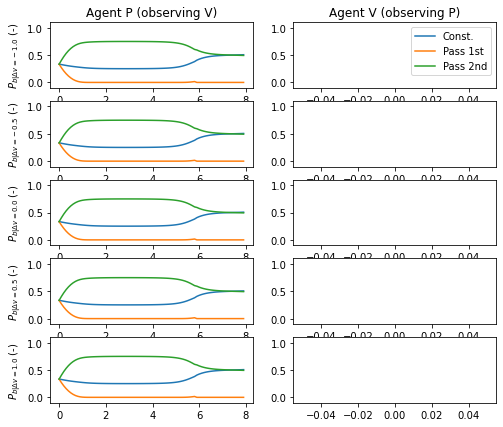

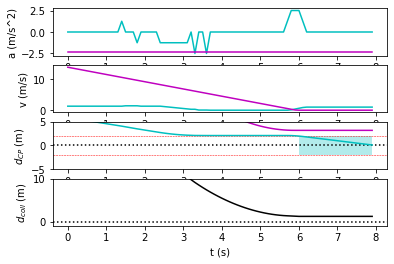

{'T_delta': 10, 'T_Of': 0.5, 'sigma_O': 0.02}


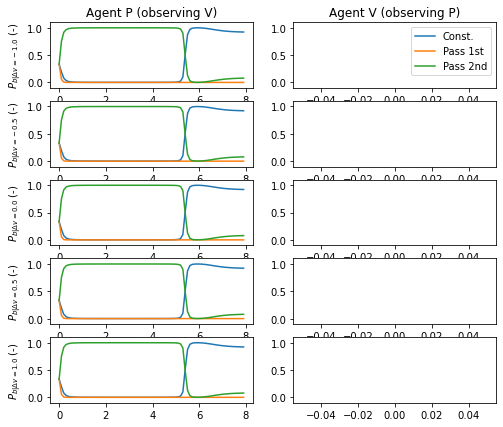

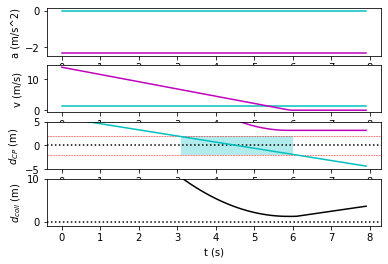

{'T_delta': 10, 'T_Of': 0.5, 'sigma_O': 0.03}


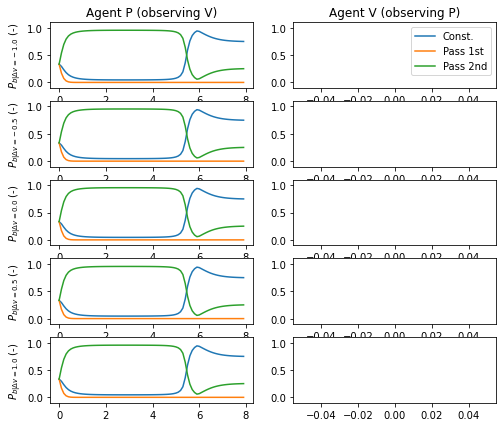

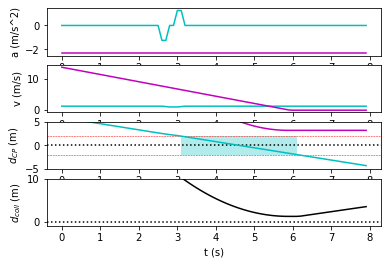

In [66]:
#import math
fit = det_fits['oVAaoBEo']
for sigma_O in (0.05, 0.02, 0.03):
    params_array = (10, 0.5, sigma_O)
    print(fit.get_params_dict(params_array))
    fit.set_params(params_array)
    sim = fit.simulate_scenario(sc_fitting.DET1S_SCENARIOS['ActPedPrioEncounter'])
    sim.do_plots(kinem_states=True, beh_probs=True)

## Conclusions

It's positive that:
* I feel pretty convinced now that the "pedestrian hesitation and speed-up" criteria need to be addressed outside of the current models/simulations.
* In `oVAoBEvoAI` and `oVAoBEooBEvoAI` we now have a couple of models which meet all of the four main criteria we have set in place for these deterministic simulations.

However, it is clear that the `ped_start_bef_veh_stop` criterion isn't very nicely met by these two best-performing models, such that it may be difficult to successfully fit them to more detailed crossing onset probability distributions later on. Also I can't quite let go of the thoughts I expressed in the 2021-08-27 notes, about beliefs in general being rather ineffectual in the non-acceleration-aware `oVA` formulation, making it hard to see how it could generalise to human-like behaviour in situations with explicit communication or other strong cues indicating behaviour, such as traffic lights, where humans definitely do seem to be acting on their beliefs.

At the moment I am thinking about the following additional model assumptions on the horizon:
* `oVAl` - a term in the affordance-based value function penalising exposure to visual looming.
    * Might allow removal of the "constant speed" belief from `oVAaoBE*` models, while also making them less collision-prone, and enabling human-like "pedestrian start before vehicle stop" behaviour.
    * Might actually also contribute to distance/speed-dependent gap acceptance behaviour.
* `oAN` - basic accumulator noise.
    * Might be enough to achieve decent probabilistic fits of crossing onset distributions, and together with `oVAl` it might even be enough to account also for distance/speed effects.
* `oSN` - sensory noise.
    * An alternative way of trying to achieve probabilistic fits of crossing onset distributions.
    * Could come in two flavours:
        * `oSNc` - sensory noise in cartesian coordinates.
        * `oSNv` - sensory noise in visual coordinates. 
    * I thought that `oSNv` might be the key to potentially accounting for distance/speed effects in crossing onset distributions, but now given the `oVAl` idea I am not so sure it is needed for this purpose specifically - so might be hard to distinguish between `oAN` and `oSNc` and `oSNv` based on this phenomenon alone. On the other hand, sensory noise of some form might instead be needed in order to enable:
* `oPF` - Bayesian / Kalman-like perceptual filtering of noisy sensory information, like I have played around with in my early tests on gaze control modelling.
    * This one only makes sense combined with `oSN*`.
    * Something like this would seem to be a way to meet the "pedestrian hesitation and speed-up" criterion.
    * It feels like an open question how `oSNv` would play out against `oVAl` - both might not be needed.


An overall todo list of things on the horizon, not necessarily in prio order:

1. Implement and test `oVAl` to see how it changes these deterministic fits.
2. Try model variants without `oVA`, to see if we can rule out those based on deterministic fits alone.
3. Run with `oEA`, to get parameterisations that might be possible to carry over straight to probabilistic fitting.
4. Include also one or more scenarios where both agents are active, for example two encounter scenarios, one with pedestrian priority and one without, to verify correct order of access and absence of collisions.
5. Push into noisy territory, testing both `oAN` and `oSN*` to fit crossing onset distributions.
6. Circle back to the "pedestrian hesitation and speed-up" phenomenon, and see if `oPF` still seems needed in order to account for it.